In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
from collections import Counter

In [63]:
#read data
df = pd.read_csv('video_games_final.csv')
#set columns limit to none
pd.set_option('display.max_columns', None)
df['id'] = df['id'].astype(str)

In [64]:
#display data
df.head()

,name,description,release_date,average_critics_rating,number_of_critics_reviews,user_average_rating,number_of_user_reviews,content_rating,platform,other_platforms,metacritic_genres,publisher,number_of_players,developer,people,id,summary,game_engines,collection,storyline,franchises,expansions,dlcs,franchise,external_games,IGDB_genres,platforms,similar_games,themes,player_perspectives,game_modes,involved_companies
0,The Legend of Zelda: Breath of the Wild,Forget everything you know about The Legend of...,2017.0,97.0,109.0,8.7,17463.0,E10+,switch,Wii U,"Action Adventure,Open-World",nintendo,No Online Multiplayer,Nintendo,"\n Kenji Matsutani\n,\n Hiroshi Umemiya\n,\n T...",7346.0,In this 3D open-world entry in the Zelda serie...,Havok Physics,"The Legend of Zelda: Skyward Sword,The Legend ...",Link awakes in a mysterious chamber after 100 ...,"The Legend of Zelda: Skyward Sword,The Legend ...",NaN,"[{'id': 41825, 'name': 'The Legend of Zelda: B...",NaN,NaN,"Role-playing (RPG),Adventure","Wii U,Nintendo Switch","Final Fantasy XV,The Elder Scrolls V: Skyrim,T...","Action,Fantasy,Survival,Drama,Sandbox,Open world",Third person,Single player,Nintendo
1,Grand Theft Auto IV,[Metacritic's 2008 Xbox 360 Game of the Year; ...,2008.0,98.0,86.0,7.9,3503.0,M,xbox-360,PC,"Action Adventure,Modern,Modern,Open-World",rockstar games,1 Player,Rockstar North,"\n Greg Smith\n,\n Steven Olds\n,\n Thomas Fre...",731.0,Grand Theft Auto IV is an action-adventure vid...,RAGE,"Grand Theft Auto: The Trilogy,Grand Theft Auto...",Grand Theft Auto IV follows the story of Niko ...,"Grand Theft Auto: San Andreas,Grand Theft Auto...",NaN,NaN,NaN,NaN,"Shooter,Racing,Adventure","PC (Microsoft Windows),PlayStation 3,Xbox 360","Grand Theft Auto III,Grand Theft Auto: San And...","Action,Open world",Third person,"Single player,Multiplayer","Rockstar North,Rockstar Toronto,Rockstar Games..."
2,Tony Hawk\'s Pro Skater 2,"Hawk's back - with new technology, new pros an...",2000.0,97.0,18.0,6.2,99.0,T,NaN,iPhone/iPad,"Sports,Alternative,Skateboarding",activision,NaN,Treyarch,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Red Dead Redemption 2,Developed by the creators of Grand Theft Auto ...,2018.0,97.0,33.0,8.0,3871.0,M,xbox-one,PC,"Action Adventure,Open-World",rockstar games,Up to 32,Rockstar Games,"\n Simon Jutras\n,\n Randy Stratton\n,\n Willi...",25076.0,Developed by the creators of Grand Theft Auto ...,RAGE,"Red Dead Redemption,Red Dead Redemption 2,Red ...","America, 1899. The end of the wild west era ha...","Red Dead Redemption,Red Dead Revolver,Red Dead...",NaN,NaN,NaN,NaN,"Shooter,Role-playing (RPG),Adventure","PC (Microsoft Windows),PlayStation 4,Xbox One,...","Miscreated,The Sinking City,Death Stranding,Ma...","Action,Drama,Open world","First person,Third person","Single player,Multiplayer,Co-operative","Take-Two Interactive,Rockstar Games"
4,Grand Theft Auto V,GTA V is arguably the best entry in the series...,2014.0,97.0,14.0,7.9,1501.0,M,xbox-one,PC,"Action Adventure,Modern,Open-World",rockstar games,Up to 30,Rockstar North,"\n Leslie Benzies\n,\n Aaron Garbut\n,\n Dan H...",1020.0,"The biggest, most dynamic and most diverse ope...",RAGE,"Grand Theft Auto: The Trilogy,Grand Theft Auto...",Los Santos: a sprawling sun-soaked metropolis ...,"Grand Theft Auto: San Andreas,Grand Theft Auto...",NaN,NaN,NaN,NaN,"Shooter,Adventure","PC (Microsoft Windows),PlayStation 3,Xbox 360,...","Mafia II,L.A. Noire,Grand Theft Auto: San Andr...","Action,Comedy,Sandbox,Open world","First person,Third person","Single player,Multiplayer","Rockstar North,Rockstar Games,Take-Two Interac..."


In [65]:
#number of (rows,columns)
df.shape

(12344, 32)

In [66]:
#number of unique values in dataset
df.nunique()

name                         12343
description                  12205
release_date                    27
average_critics_rating          85
number_of_critics_reviews      115
user_average_rating             89
number_of_user_reviews        1072
content_rating                   7
platform                        13
other_platforms                 14
metacritic_genres             1932
publisher                     2363
number_of_players               55
developer                     3688
people                        3930
id                            8534
summary                       8324
game_engines                   402
collection                    1883
storyline                     1679
franchises                     573
expansions                     279
dlcs                           717
franchise                      219
external_games                7193
IGDB_genres                    922
platforms                     1271
similar_games                 7656
themes              

In [67]:
#number of missing values in each column
df.isnull().sum()

name                             1
description                     28
release_date                     2
average_critics_rating           9
number_of_critics_reviews        1
user_average_rating           1006
number_of_user_reviews        1006
content_rating                1691
platform                      2822
other_platforms               6141
metacritic_genres                1
publisher                       13
number_of_players             2982
developer                       15
people                        8223
id                               0
summary                       4006
game_engines                 10630
collection                    7749
storyline                    10661
franchises                   10520
expansions                   12065
dlcs                         11627
franchise                    11727
external_games                5151
IGDB_genres                   4144
platforms                     4110
similar_games                 4011
themes              

In [68]:
corelation = df.corr()

# corrletion between variables

<AxesSubplot:>

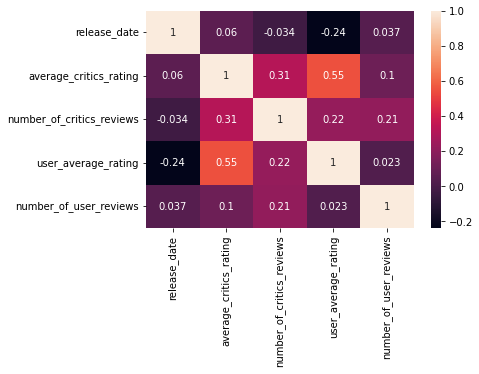

In [69]:
#using heat map to show corelation between variables
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [70]:
df.columns

Index(['name', 'description', 'release_date', 'average_critics_rating',
       'number_of_critics_reviews', 'user_average_rating',
       'number_of_user_reviews', 'content_rating', 'platform',
       'other_platforms', 'metacritic_genres', 'publisher',
       'number_of_players', 'developer', 'people', 'id', 'summary',
       'game_engines', 'collection', 'storyline', 'franchises', 'expansions',
       'dlcs', 'franchise', 'external_games', 'IGDB_genres', 'platforms',
       'similar_games', 'themes', 'player_perspectives', 'game_modes',
       'involved_companies'],
      dtype='object')

# corelation between critics average ratings and user ratings

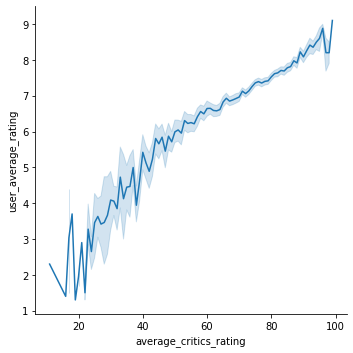

In [71]:
#see the corelation between critics average ratings and user ratings
sns.relplot(x = 'average_critics_rating',y= 'user_average_rating',data=df,kind='line')

# display the distribution of average ratings

### critics average rating distribution

C:\Users\Nawaf\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

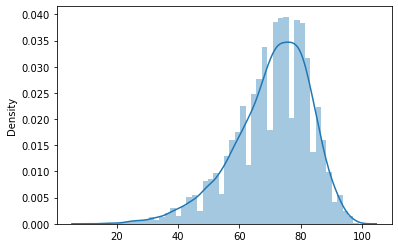

In [72]:
sns.distplot(x=df['average_critics_rating'])

### user average rating distribution

C:\Users\Nawaf\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

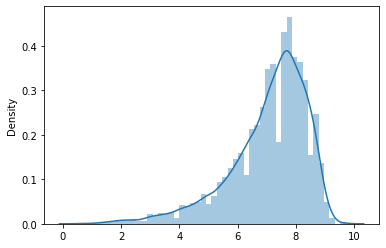

In [73]:

sns.distplot(x=df['user_average_rating'])

In [74]:
df['release_date'].dtypes


dtype('float64')

In [75]:
df['release_date'][0]
dates = df['release_date'].sort_values(ascending=False)

# ratings changes of games released in different years

## critics ratings

<AxesSubplot:xlabel='release_date', ylabel='average_critics_rating'>

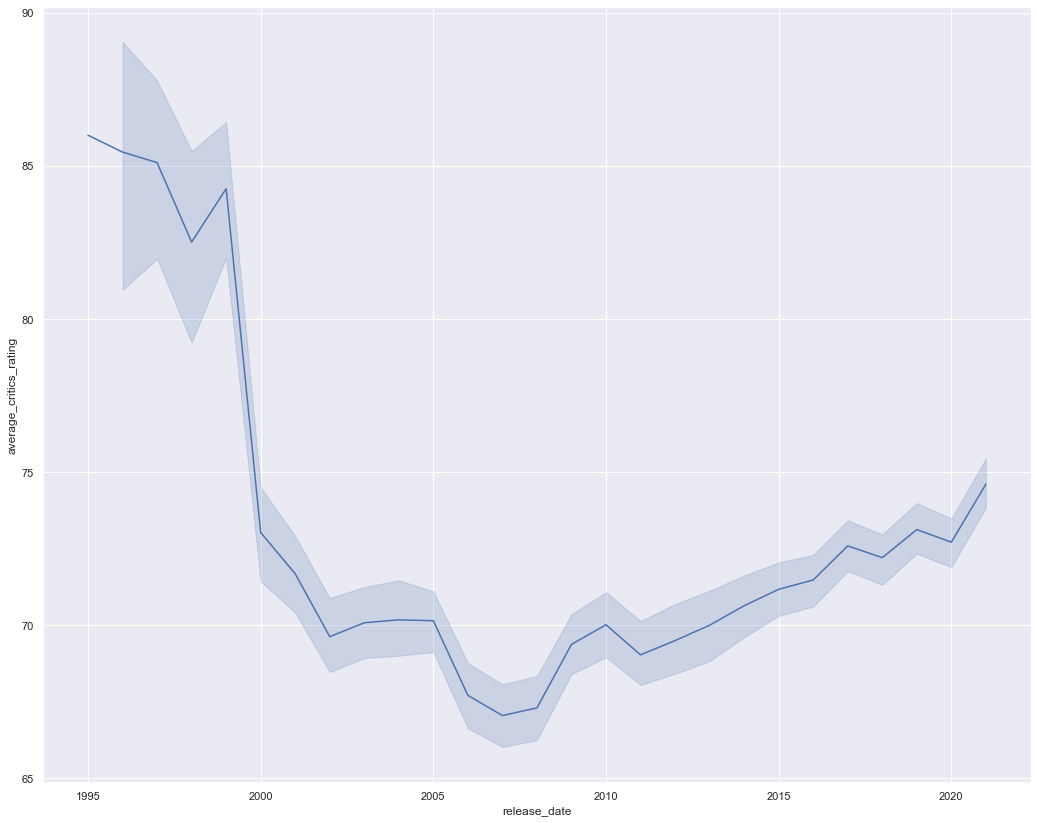

In [97]:
sns.set(rc={'figure.figsize':(17.7,14.27)})
plot = sns.lineplot(x = dates,y=df['average_critics_rating'])
plot

## users ratings

<AxesSubplot:xlabel='release_date', ylabel='user_average_rating'>

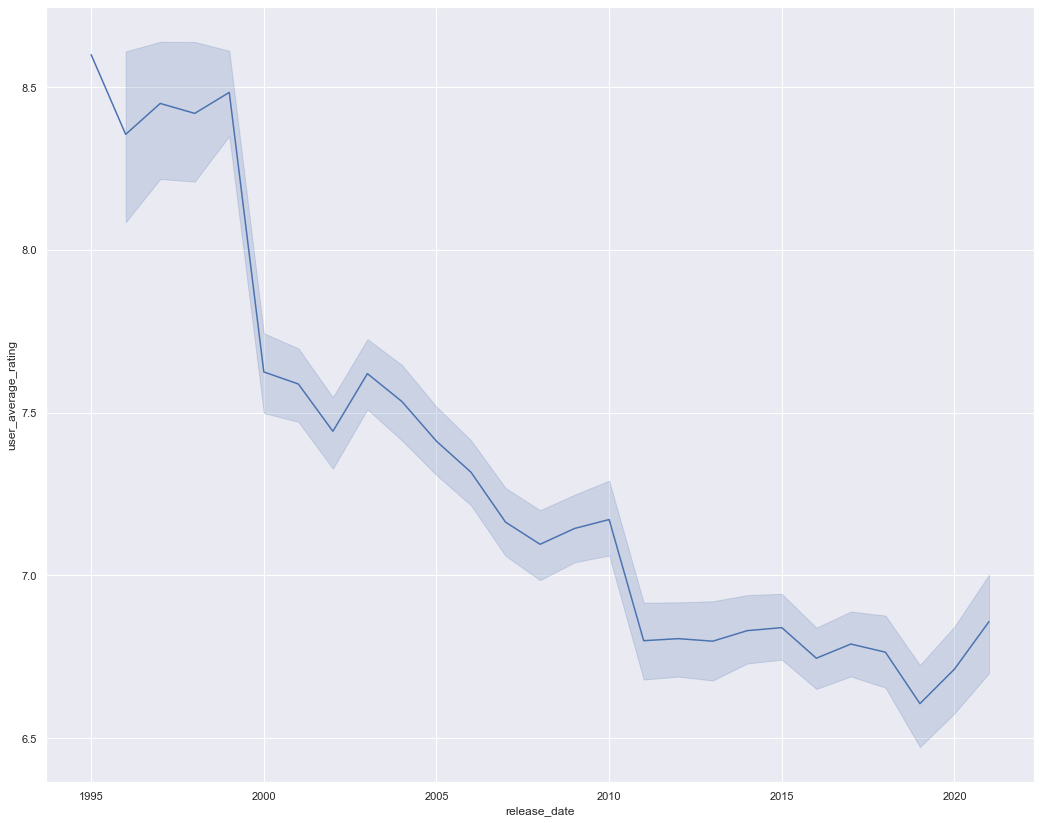

In [100]:
sns.set(rc={'figure.figsize':(17.7,14.27)})
sns.lineplot(x = dates,y=df['user_average_rating'])

In [88]:
pl = df['platform'].loc[df['platform']!= 'nan'].unique()

# Critics ratings grouped into platforms

<AxesSubplot:xlabel='platform', ylabel='average_critics_rating'>

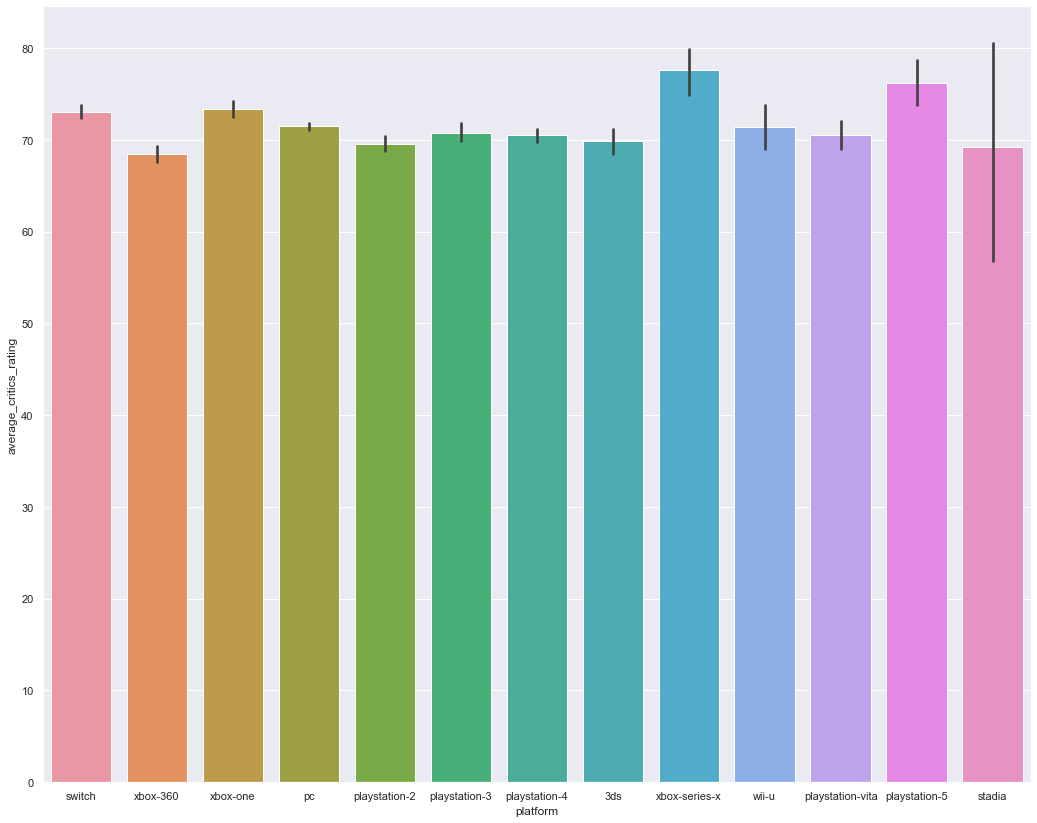

In [111]:
sns.set(rc={'figure.figsize':(17.7,14.27)})
sns.barplot(x = df['platform'],y=df['average_critics_rating'])

# Users ratings grouped into platforms

<AxesSubplot:xlabel='platform', ylabel='user_average_rating'>

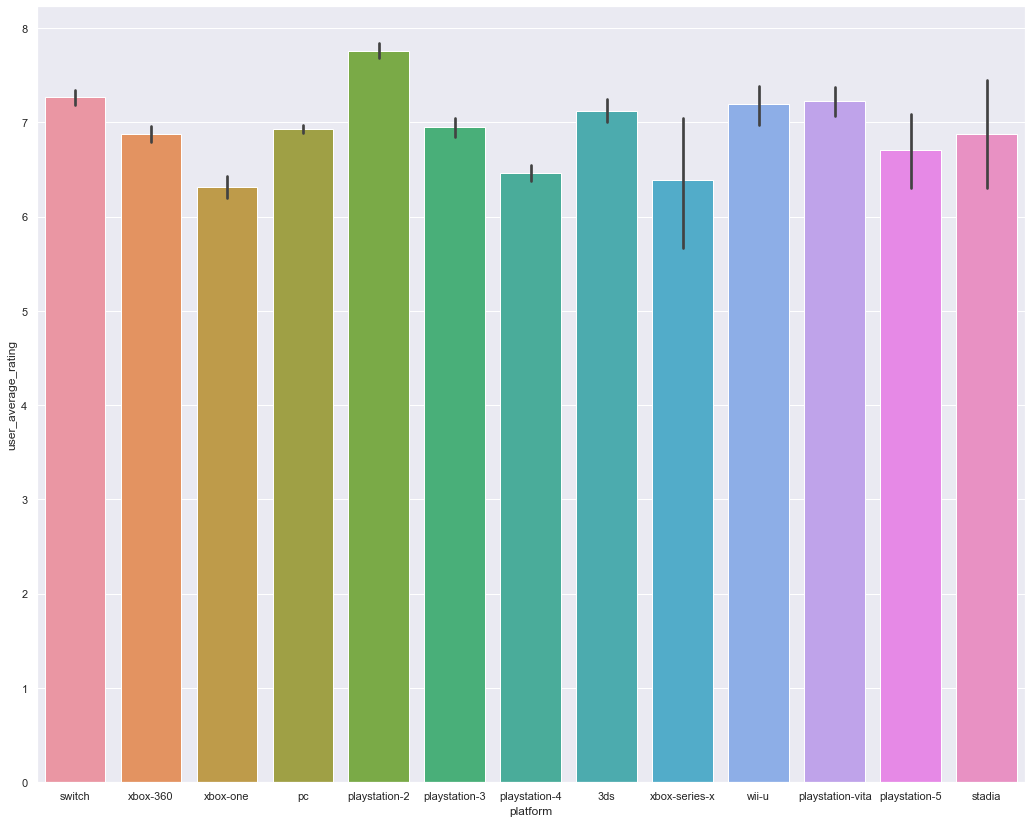

In [112]:
sns.set(rc={'figure.figsize':(17.7,14.27)})
sns.barplot(x = df['platform'],y=df['user_average_rating'],)